<a href="https://colab.research.google.com/github/frankbass3/OCR-Tesseract-Tests/blob/main/OCR_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


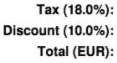

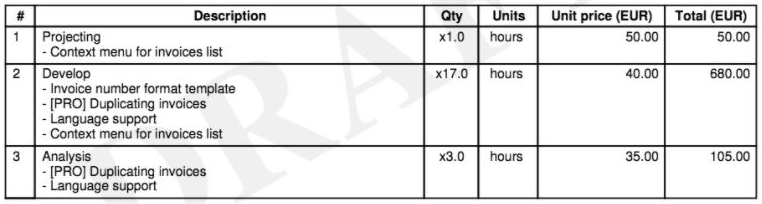

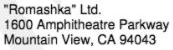

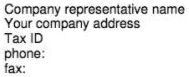

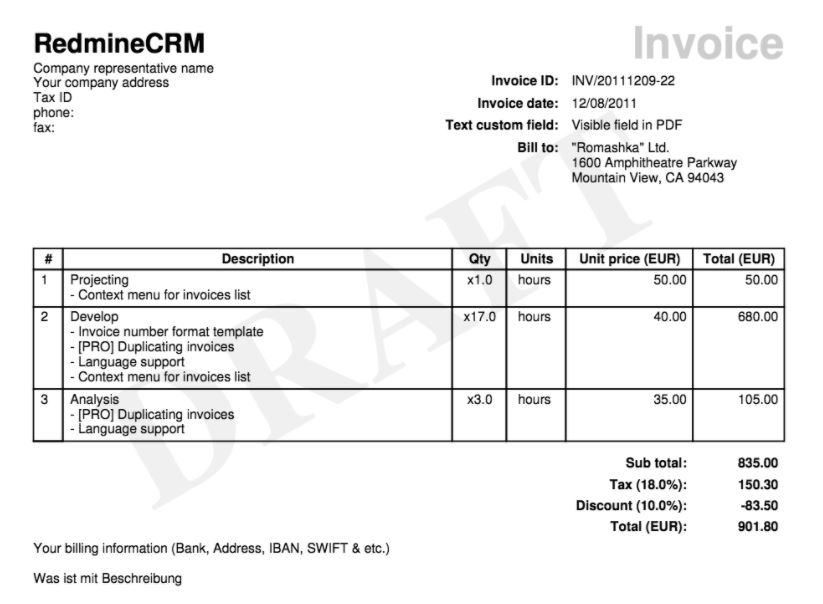

In [166]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

im1 = cv2.imread('./test.JPG',0)
ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)

dilated = cv2.dilate(thresh1,kernel,iterations = 2)

contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_TC89_KCOS)
cordinates = []
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2_imshow(im1[y:y+h,x:x+w])
    cordinates.append(im1[y:y+h,x:x+w])
    #bound the images
    #cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),1)

cv2_imshow(im1)

# cv2.namedWindow('BindingBox', cv2.WINDOW_NORMAL)
# cv2.imwrite('./BindingBox4.jpg',im1)

 10    40
-1     18
 5      2
 51     1
Name: 3, dtype: int64


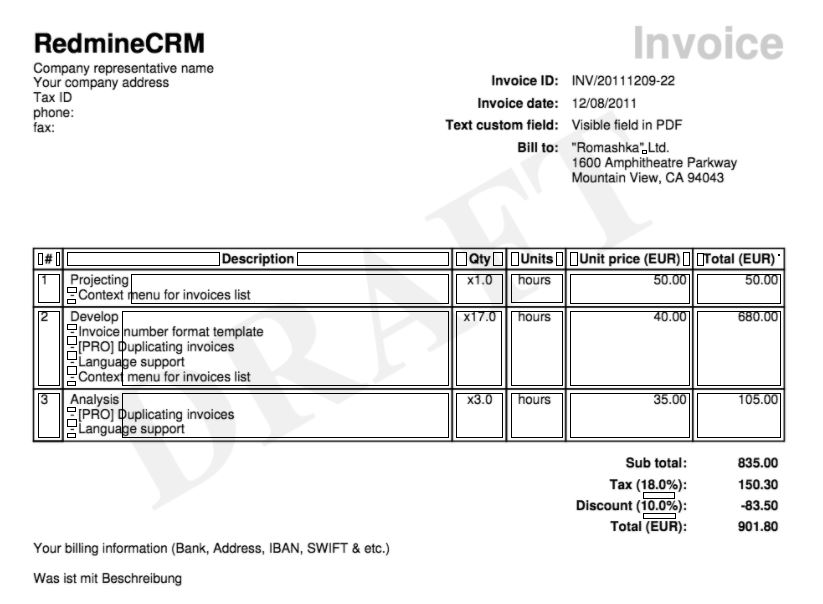

In [39]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd

im1 = cv2.imread('./test.JPG',0)
ret,thresh1 = cv2.threshold(im1,180,255,cv2.THRESH_BINARY_INV)

kernel = np.ones((5,5),np.uint8)

dilated = cv2.dilate(thresh1,kernel,iterations = 2)

contours, hierarchy = cv2.findContours(dilated,cv2.RETR_TREE,cv2.CHAIN_APPROX_TC89_KCOS)
hierarchy = hierarchy[0]
hdf = pd.DataFrame(hierarchy[1:])
print(hdf[3].value_counts())


for cont,he in zip(contours, hierarchy):
  #print(he)
  if he[3] in [10,5,51]:
    x,y,w,h = cv2.boundingRect(cont)
    cordinates.append((x,y,w,h))
    #bound the images
    cv2.rectangle(im1,(x,y),(x+w,y+h),(0,255,0),1)
  
cv2_imshow(im1)


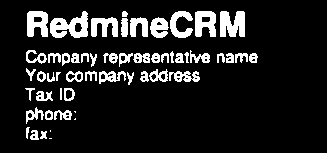

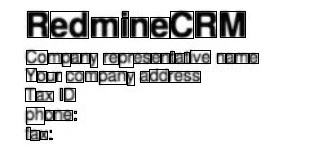

In [106]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('./test2.JPG',0)

ret, mask = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV)
cv2_imshow(mask)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
dilated = cv2.dilate(mask, kernel, iterations=2)
contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

crops = []
for contour in contours:
    [x, y, w, h] = cv2.boundingRect(contour)
    crops.append(img[y:y+h, x:x+w])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)

cv2_imshow(img)



In [88]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

text: Was ist mit Beschreibung



text: Your billing information (Bank, Address, IBAN, SWIFT & etc.)



text: 901.80



text: (83.50



text: 150.30



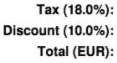

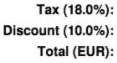

text: Tax (18.0%):
Discount (10.0%):
Total (EUR):



text: 835.00



text: Sub total:



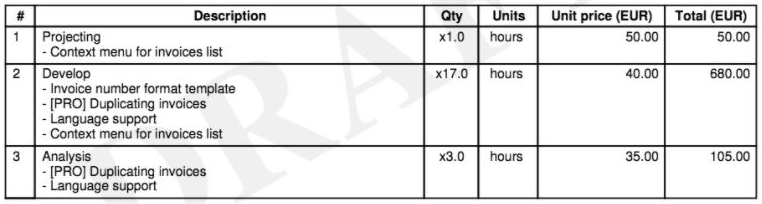

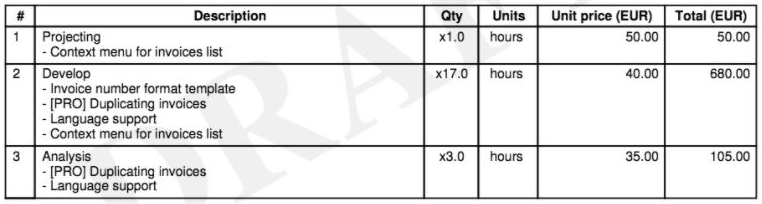

text: [#[ Description ty J Units | Unit price (EUR) | Total (EUR)
Projecting hours
= Context menu for invoices list
Develop x17.0 40.00 680.00
= Invoice number format template
- [PRO] Duplicating invoices
~ Language support
= Context menu for invoices list

3 | Analysis x30

- [PRO] Duplicating invoices
= Language support



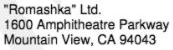

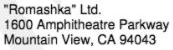

text: “Romashka" Ltd.
1600 Amphitheatre Parkway
Mountain View, CA 94043.



text: Bill to:



text: Visible field in PDF



text: Text custom field:



text: 12/08/2011



text: Invoice date:



text: INV/20111209-22



text: Invoice ID:



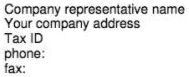

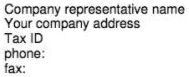

text: Company representative name
Your company address

Tax ID

phone:

fax:



text: RedmineCRM



In [169]:
import pytesseract
from pytesseract import Output
import cv2
from google.colab.patches import cv2_imshow

for img_cv in cordinates:
  cv2_imshow(img_cv)
  #img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

  # d = pytesseract.image_to_data(mask, output_type=Output.DICT)
  # n_boxes = len(d['level'])
  # print('nbox:', n_boxes)
  # for x in d['text']:
  #   print('text', x)
  # for i in range(n_boxes):
  #     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
  #     cv2.rectangle(mask, (x, y), (x + w, y + h), (0, 255, 0), 1)
  
  custom_config = '--oem 3 --psm 6'
  cv2_imshow(img_cv)
  print('text:' ,pytesseract.image_to_string(img_cv, lang='eng',config=custom_config))

# for img_cv in cordinates:
#   ret,thresh1 = cv2.threshold(img_cv,180,255,cv2.THRESH_BINARY_INV)
#   cv2_imshow(thresh1)
#   kernel = np.ones((5,5),np.uint8)
#   dilated = cv2.dilate(thresh1,kernel,iterations = 2)
#   print(pytesseract.image_to_string(dilated, lang='eng', config='-psm 1'))